In [14]:
# 📦 Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Loading Data
ball_df = pd.read_csv("IPL_Ball_by_Ball_2022.csv")
match_df = pd.read_csv("IPL_Matches_2022.csv")

# 👁️ Previewing Data
print("Ball-by-Ball Data:")
display(ball_df.head())

print("Match Data:")
display(match_df.head())


Ball-by-Ball Data:


,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


Match Data:


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [16]:
# Shape and info
print("Ball Data:", ball_df.shape)
print("Match Data:", match_df.shape)

print(ball_df.info())
print(match_df.info())

# Null value check
print(ball_df.isnull().sum())
print(match_df.isnull().sum())


Ball Data: (17912, 17)
Match Data: (74, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 17912 non-null  int64 
 1   innings            17912 non-null  int64 
 2   overs              17912 non-null  int64 
 3   ballnumber         17912 non-null  int64 
 4   batter             17912 non-null  object
 5   bowler             17912 non-null  object
 6   non-striker        17912 non-null  object
 7   extra_type         1050 non-null   object
 8   batsman_run        17912 non-null  int64 
 9   extras_run         17912 non-null  int64 
 10  total_run          17912 non-null  int64 
 11  non_boundary       17912 non-null  int64 
 12  isWicketDelivery   17912 non-null  int64 
 13  player_out         912 non-null    object
 14  kind               912 non-null    object
 15  fielders_involved  704 non-null    object
 

In [18]:
def total_runs_by_player(player_name):
    runs = ball_df[ball_df['batter'] == player_name]['batsman_run'].sum()
    print(f"{player_name} scored {runs} runs in IPL 2022.")
    return runs

In [20]:
def strike_rate(player_name):
    player_df = ball_df[ball_df['batter'] == player_name]
    runs = player_df['batsman_run'].sum()
    balls = player_df.shape[0]
    sr = (runs / balls) * 100 if balls > 0 else 0
    print(f"{player_name}'s strike rate: {sr:.2f}")
    return sr

In [22]:
def top_10_run_scorers():
    top_scorers = ball_df.groupby('batter')['batsman_run'].sum().sort_values(ascending=False).head(10)
    print("Top 10 Run Scorers in IPL 2022:")
    display(top_scorers)
    top_scorers.plot(kind='bar', title="Top 10 Run Scorers", ylabel="Runs", xlabel="Players", figsize=(10,5))
    plt.grid()
    plt.show()

Jos Buttler scored 0 runs in IPL 2022.
KL Rahul's strike rate: 130.51
Top 10 Run Scorers in IPL 2022:


batter
JC Buttler      863
KL Rahul        616
Q de Kock       508
HH Pandya       487
Shubman Gill    483
DA Miller       481
F du Plessis    468
S Dhawan        460
SV Samson       458
DJ Hooda        451
Name: batsman_run, dtype: int64

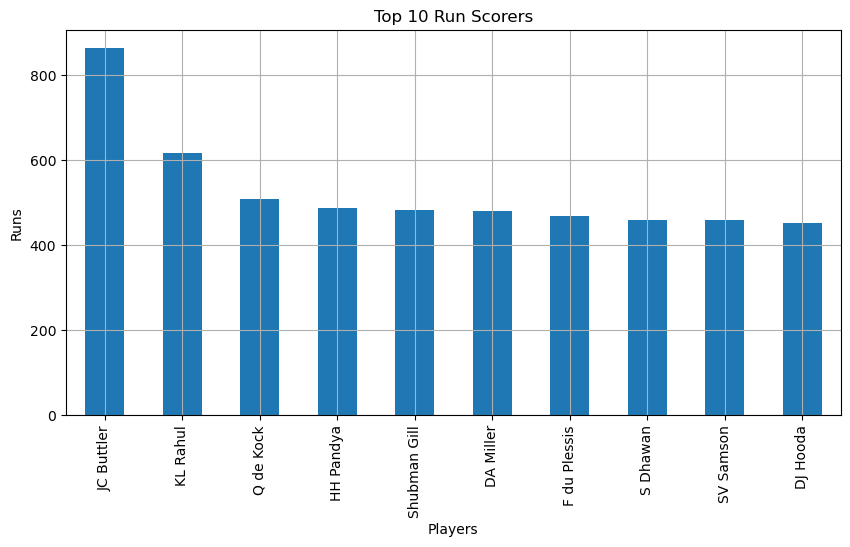

In [24]:
# Example function calls
total_runs_by_player("Jos Buttler")
strike_rate("KL Rahul")
top_10_run_scorers()

In [26]:
def run_rate(total_runs, total_overs):
    rr = total_runs / total_overs if total_overs > 0 else 0
    print(f"Run Rate: {rr:.2f}")
    return rr
def economy_rate(runs_conceded, overs_bowled):
    eco = runs_conceded / overs_bowled if overs_bowled > 0 else 0
    print(f"Economy Rate: {eco:.2f}")
    return eco
def sixes_per_ball(player_name):
    player_df = ball_df[ball_df['batter'] == player_name]
    total_balls = player_df.shape[0]
    sixes = player_df[player_df['batsman_run'] == 6].shape[0]
    spb = sixes / total_balls if total_balls > 0 else 0
    print(f"{player_name}'s Sixes per Ball: {spb:.4f}")
    return spb

In [30]:
run_rate(175, 20)
economy_rate(32, 4)
sixes_per_ball("YBK Jaiswal")

Run Rate: 8.75
Economy Rate: 8.00
YBK Jaiswal's Sixes per Ball: 0.0505


0.050505050505050504